###  Analysis of Year-over-Year Change in Employment Level by Industry 
#### EIG Skills Assessment 
Completed by Maryana Shnitser 

This script analyzes U.S. employment trends from 2015 to 2025 using BLS data. The primary focus is calculating and visualizing year-over-year changes in employment level growth rates to better understand how the impacts of economic shocks vary across industries. 

In [17]:
# import necessary libraries 
import pandas as pd
import os

import matplotlib.pyplot as plt 
! pip install seaborn
import seaborn as sns

In [2]:
# set working env
os.chdir('/Users/maryanashnitser/Downloads/EIG-Shnitser-Skills-Assessment')

In [3]:
# load necessary data 
qcew_2015 = pd.read_csv('2015.q1-q4.singlefile.csv') #2015 data file
qcew_2017 = pd.read_csv('2017.q1-q4.singlefile.csv') #2017 data file
qcew_2019 = pd.read_csv('2019.q1-q4.singlefile.csv') #2019 data file 
qcew_2021 = pd.read_csv('2021.q1-q4.singlefile.csv') #2021 data file
qcew_2023 = pd.read_csv('2023.q1-q4.singlefile.csv') #2023 data file
qcew_2025 = pd.read_csv('2025.q1-q2.singlefile.csv') #2025 data file 


/var/folders/zs/qg91ct2s3r1dh50y68w3rrf80000gn/T/ipykernel_19941/2938973606.py:2: DtypeWarning: Columns (0,7,16,25) have mixed types. Specify dtype option on import or set low_memory=False.
  qcew_2015 = pd.read_csv('2015.q1-q4.singlefile.csv') #2015 data file
/var/folders/zs/qg91ct2s3r1dh50y68w3rrf80000gn/T/ipykernel_19941/2938973606.py:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  qcew_2017 = pd.read_csv('2017.q1-q4.singlefile.csv') #2017 data file
/var/folders/zs/qg91ct2s3r1dh50y68w3rrf80000gn/T/ipykernel_19941/2938973606.py:4: DtypeWarning: Columns (0,2,7,16,25) have mixed types. Specify dtype option on import or set low_memory=False.
  qcew_2019 = pd.read_csv('2019.q1-q4.singlefile.csv') #2019 data file
/var/folders/zs/qg91ct2s3r1dh50y68w3rrf80000gn/T/ipykernel_19941/2938973606.py:5: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  qcew_2021 = pd.read_csv('2021.q1-q4.sin

In [4]:
# use 'agg_lvl' to subset to data of interest 
# for this analysis - national level, ownership sector, and supersector (13)

# check data types of variables that you are filtering on to sure proper syntax 
print('agg_lvl data type', qcew_2025['agglvl_code'].dtype)
print('agg_lvl data type', qcew_2025['industry_code'].dtype)

# filter each years dataset to where 'agg_lvl' = 13 
qcew_13_2015 = qcew_2015[(qcew_2015['agglvl_code'] == 13)]
qcew_13_2017 = qcew_2017[(qcew_2017['agglvl_code'] == 13)]
qcew_13_2019 = qcew_2019[(qcew_2019['agglvl_code'] == 13)]
qcew_13_2021 = qcew_2021[(qcew_2021['agglvl_code'] == 13)]
qcew_13_2023 = qcew_2023[(qcew_2023['agglvl_code'] == 13)]
qcew_13_2025 = qcew_2025[(qcew_2025['agglvl_code'] == 13)]

# print dimensions and head of one dataset to examine 
print(qcew_13_2017.shape) 
qcew_13_2017.head()


agg_lvl data type int64
agg_lvl data type object
(188, 42)


,area_fips,own_code,industry_code,agglvl_code,size_code,year,qtr,disclosure_code,qtrly_estabs,month1_emplvl,...,oty_month3_emplvl_chg,oty_month3_emplvl_pct_chg,oty_total_qtrly_wages_chg,oty_total_qtrly_wages_pct_chg,oty_taxable_qtrly_wages_chg,oty_taxable_qtrly_wages_pct_chg,oty_qtrly_contributions_chg,oty_qtrly_contributions_pct_chg,oty_avg_wkly_wage_chg,oty_avg_wkly_wage_pct_chg
14228392,US000,1,1011,13,0,2017,1,NaN,70,2458,...,-19,-0.8,1440244,3.4,0,0.0,0,0.0,20,1.5
14228393,US000,1,1011,13,0,2017,2,NaN,70,2798,...,-21,-0.5,697651,1.6,0,0.0,0,0.0,10,1.0
14228394,US000,1,1011,13,0,2017,3,NaN,70,4014,...,-17,-0.4,13306723,18.6,0,0.0,0,0.0,266,19.1
14228395,US000,1,1011,13,0,2017,4,NaN,70,3483,...,-123,-4.8,1651481,3.7,0,0.0,0,0.0,99,8.7
14228396,US000,1,1012,13,0,2017,1,NaN,2,5,...,1,25.0,25713,31.2,0,0.0,0,0.0,78,4.9


In [5]:
# print column names and identify variables of interest
print(qcew_13_2017.columns.unique())

Index(['area_fips', 'own_code', 'industry_code', 'agglvl_code', 'size_code',
       'year', 'qtr', 'disclosure_code', 'qtrly_estabs', 'month1_emplvl',
       'month2_emplvl', 'month3_emplvl', 'total_qtrly_wages',
       'taxable_qtrly_wages', 'qtrly_contributions', 'avg_wkly_wage',
       'lq_disclosure_code', 'lq_qtrly_estabs', 'lq_month1_emplvl',
       'lq_month2_emplvl', 'lq_month3_emplvl', 'lq_total_qtrly_wages',
       'lq_taxable_qtrly_wages', 'lq_qtrly_contributions', 'lq_avg_wkly_wage',
       'oty_disclosure_code', 'oty_qtrly_estabs_chg',
       'oty_qtrly_estabs_pct_chg', 'oty_month1_emplvl_chg',
       'oty_month1_emplvl_pct_chg', 'oty_month2_emplvl_chg',
       'oty_month2_emplvl_pct_chg', 'oty_month3_emplvl_chg',
       'oty_month3_emplvl_pct_chg', 'oty_total_qtrly_wages_chg',
       'oty_total_qtrly_wages_pct_chg', 'oty_taxable_qtrly_wages_chg',
       'oty_taxable_qtrly_wages_pct_chg', 'oty_qtrly_contributions_chg',
       'oty_qtrly_contributions_pct_chg', 'oty_avg_wkl

In [6]:
# create list to store relevant column names to keep for analysis 
cols_to_keep = ['own_code', 'industry_code', 'year', 'qtr', 'avg_wkly_wage',
                'month1_emplvl', 'month2_emplvl', 'month3_emplvl',
                'oty_month3_emplvl_chg', 'oty_month3_emplvl_pct_chg'] 

# apply to each dataset 
qcew_13_2015_filt = qcew_13_2015[cols_to_keep]
qcew_13_2017_filt = qcew_13_2017[cols_to_keep]
qcew_13_2019_filt = qcew_13_2019[cols_to_keep]
qcew_13_2021_filt = qcew_13_2021[cols_to_keep]
qcew_13_2023_filt = qcew_13_2023[cols_to_keep]
qcew_13_2025_filt = qcew_13_2025[cols_to_keep]

# print one dataset to preview 
print(qcew_13_2023_filt.shape)
qcew_13_2023_filt.head()


(188, 10)


,own_code,industry_code,year,qtr,avg_wkly_wage,month1_emplvl,month2_emplvl,month3_emplvl,oty_month3_emplvl_chg,oty_month3_emplvl_pct_chg
14584480,1,1011,2023,1,1429,2952,3014,3206,217,7.3
14584481,1,1011,2023,2,1666,3543,3882,4070,-55,-1.3
14584482,1,1011,2023,3,1811,4423,4448,4332,165,4.0
14584483,1,1011,2023,4,1844,4132,3678,3335,151,4.7
14584484,1,1012,2023,1,2642,5,5,5,1,25.0


In [7]:
# concat tables 

# list of all datasets
qcew_list = [qcew_13_2015_filt, qcew_13_2017_filt, qcew_13_2019_filt, qcew_13_2021_filt, 
            qcew_13_2023_filt, qcew_13_2025_filt]

# concatinate tables
qcew_all = pd.concat(qcew_list, ignore_index=True)

# examine output 
print(qcew_all.shape)
qcew_all.head()


(1034, 10)


,own_code,industry_code,year,qtr,avg_wkly_wage,month1_emplvl,month2_emplvl,month3_emplvl,oty_month3_emplvl_chg,oty_month3_emplvl_pct_chg
0,1,1011,2015,1,1290,2446,2460,2515,38,1.5
1,1,1011,2015,2,1009,2851,3188,3568,81,2.3
2,1,1011,2015,3,1584,4031,3998,3766,-22,-0.6
3,1,1011,2015,4,1067,3494,3034,2698,95,3.6
4,1,1012,2015,1,1450,4,4,4,-1,-20.0


In [8]:
# summary statistics for variable of interest before aggregation
#qcew_all['month3_emplvl'].describe()

In [9]:
# add column with regular industry name instead of code 

#list unique codes 
qcew_all['industry_code'].unique()

# Select which industries to keep to chart and remove others 
    #removed 'unclassified', 'other services', 'construction', 'financial activities', 'information', 'natural resources and mining'to reduce 
    # redundancy and noise in the final chart
qcew_all['industry_code'] = qcew_all['industry_code'].astype(str)
qcew_all = qcew_all[~qcew_all['industry_code'].isin(['1029','1027', '1012', '1023', '1022', '1011'])]

# create dictionary to add industry name
ind_code_to_name = {
    '1013':'Manufacturing',
    '1021':'Trade, Transportation, and Utilities',
    '1024':'Professional and Business Services',
    '1025':'Education and Health Services',
    '1026':'Leisure and Hospitality',
    '1028':'Public Administration',
}

# new 'industry_name' col and apply changes 
qcew_all['industry_name'] = qcew_all['industry_code'].map(ind_code_to_name)
qcew_all.head() # print 

,own_code,industry_code,year,qtr,avg_wkly_wage,month1_emplvl,month2_emplvl,month3_emplvl,oty_month3_emplvl_chg,oty_month3_emplvl_pct_chg,industry_name
8,1,1013,2015,1,1596,43632,44086,44490,2314,5.5,Manufacturing
9,1,1013,2015,2,1402,44625,44819,45065,2286,5.3,Manufacturing
10,1,1013,2015,3,1576,45530,45818,46050,2550,5.9,Manufacturing
11,1,1013,2015,4,1440,46365,46247,46323,3599,8.4,Manufacturing
12,1,1021,2015,1,1247,665048,665216,664989,2685,0.4,"Trade, Transportation, and Utilities"


In [10]:
# data aggregated by industry, year, and quarter
aggregate_data = qcew_all.groupby(['industry_name', 'year', 'qtr'], as_index=False).agg({
    'month3_emplvl': 'sum'  # total employment level
})
print(aggregate_data.head())  # print the first few rows of the aggregated data

                   industry_name  year  qtr  month3_emplvl
0  Education and Health Services  2015    1       32907762
1  Education and Health Services  2015    2       32400612
2  Education and Health Services  2015    3       32740345
3  Education and Health Services  2015    4       33546930
4  Education and Health Services  2017    1       34270168


In [11]:
# for chart - filter to only include q1 data to compare employment levels across years and reduce noise between quarters 
q1_data = aggregate_data[aggregate_data['qtr'] == 1].copy()

# Aggregate employment levelby industry and year
q1_data_agg = q1_data.groupby(['industry_name', 'year'], as_index=False)['month3_emplvl'].sum()

# print
q1_data_agg.head()

,industry_name,year,month3_emplvl
0,Education and Health Services,2015,32907762
1,Education and Health Services,2017,34270168
2,Education and Health Services,2019,35344528
3,Education and Health Services,2021,34235915
4,Education and Health Services,2023,36271367


In [12]:
# summary statistics for variable of interest after aggregation 
q1_data_agg['month3_emplvl'].describe()

count    3.600000e+01
mean     2.008730e+07
std      9.699651e+06
min      7.147774e+06
25%      1.256667e+07
50%      1.808265e+07
75%      2.828700e+07
max      3.866743e+07
Name: month3_emplvl, dtype: float64

In [13]:
# sort data by industry and year
sort_industry_yr = q1_data_agg.sort_values(by=['industry_name', 'year'])

# calculate percent growth in 'month3_emplvl' year-over-year
sort_industry_yr['emp_change_pct'] = sort_industry_yr.groupby('industry_name')['month3_emplvl'].pct_change() * 100

#print 
#keep NaN values for the first year of each industry (2015 -not on chart)
sort_industry_yr.head()

,industry_name,year,month3_emplvl,emp_change_pct
0,Education and Health Services,2015,32907762,NaN
1,Education and Health Services,2017,34270168,4.140075
2,Education and Health Services,2019,35344528,3.134972
3,Education and Health Services,2021,34235915,-3.136590
4,Education and Health Services,2023,36271367,5.945371


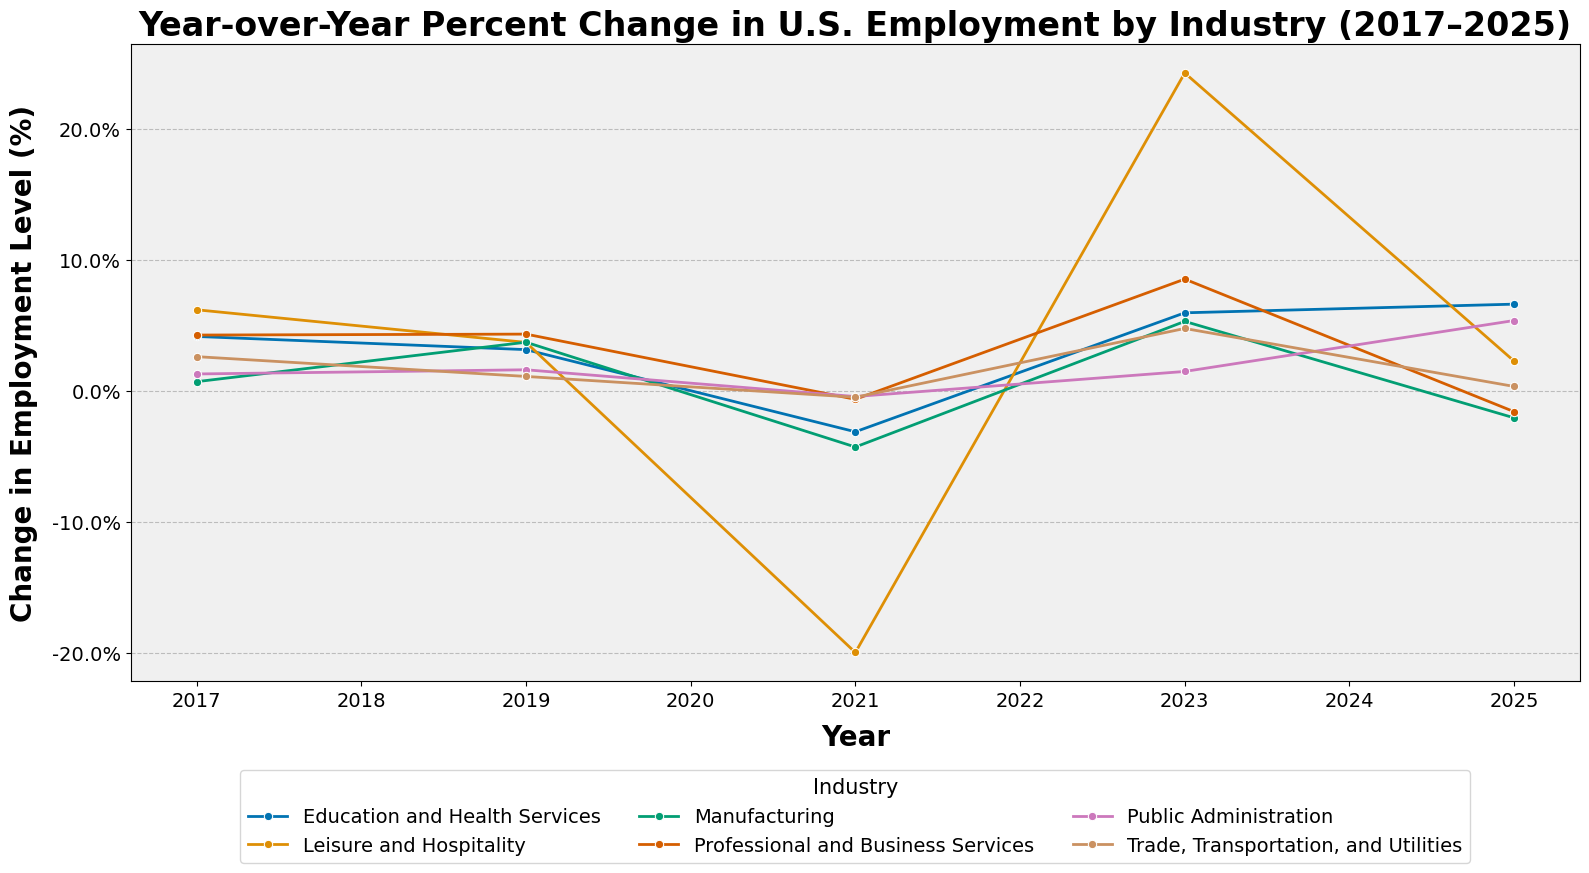

In [ ]:
# create chart
plt.figure(figsize=(16,9))

# plot year-over-year growth
ax= sns.lineplot(
    data = sort_industry_yr,
    x= 'year', # x axis variable
    y= 'emp_change_pct', # y axis variable
    hue= 'industry_name', # color by industry
    marker= 'o', # marker style
    linewidth= 2, # line width
    markersize= 6,# marker size
    palette= 'colorblind', # color palette
    linestyle= '-', # line style
    legend= True # show legend
)
ax.set_facecolor('#f0f0f0') # background color of plot

plt.xticks(fontsize=14)  # x-axis number font
plt.yticks(fontsize=14)  # y-axis number font

# format y-axis ticks to show percentage with one decimal place
plt.gca().yaxis.set_major_formatter(lambda x, _: f'{x:.1f}%')

# Axis labels
plt.xlabel('Year', fontsize=20, weight='bold', labelpad=10)
plt.ylabel('Change in Employment Level (%)', fontsize=20, weight='bold', labelpad=10)

# title
plt.title('Year-over-Year Percent Change in U.S. Employment by Industry (2017–2025)', 
          fontsize=24, weight='bold')

# gridlines
plt.grid(axis='y', linestyle='--', alpha=0.8)

# legend outside
legend = plt.legend(title='Industry', 
           bbox_to_anchor=(0.5, -0.3), 
           loc='lower center', 
           ncol=3,  
           fontsize=14)

legend.get_title().set_fontsize(15) # legend title 
# legend.get_title().set_fontweight('bold')

plt.tight_layout()
plt.show()
